In [1]:
# Specify the name that is used to seach for the data
# place_name = "KAIST N1, Daejeon, South Korea"
place_name = "Kim Beang-Ho & Kim Sam-Youl ITC Building"
# place_name = "Pohang Steel Plant, Jecheol-dong, Nam-gu, Pohang-si, North Gyeongsang, 37920, South Korea"

In [2]:
# import osmnx
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox
import pandas as pd
import Polygon
from matplotlib.patches import Polygon
from PIL import Image
from IOHandler import *
# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)
# area = ox.geocode_to_gdf('223633355', by_osmid=True)


In [3]:
# Check the data type
area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((127.36517 36.37437, 127.36517 36.374...",36.374368,36.374013,127.366222,127.365172,228504570,way,223633355,36.37417,127.365698,building,university,30,0.00001,building,Kim Beang-Ho & Kim Sam-Youl ITC Building (N1),"Kim Beang-Ho & Kim Sam-Youl ITC Building (N1),..."


In [4]:
# Check the data type
type(area)

geopandas.geodataframe.GeoDataFrame

<Axes: >

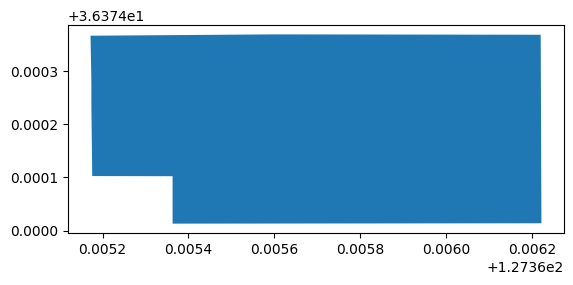

In [5]:
area.plot()


In [6]:
# List key-value pairs for tags
tags = {'building': True}   

buildings = ox.geometries_from_place(place_name, tags)
buildings.head()

/tmp/ipykernel_3609000/2857596332.py:4: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  buildings = ox.geometries_from_place(place_name, tags)


geometry  \
element_type osmid                                                          
way          223633355  POLYGON ((127.36517 36.37437, 127.36517 36.374...   
             468197980  POLYGON ((127.36517 36.37437, 127.36560 36.374...   

                                                                    nodes  \
element_type osmid                                                          
way          223633355  [2325103531, 4943267285, 4943267291, 494326728...   
             468197980  [2325103531, 4627616337, 4627616338, 462761633...   

                       alt_name    building building:levels  \
element_type osmid                                            
way          223633355       N1  university               9   
             468197980      NaN         yes             NaN   

                                        name  \
element_type osmid                             
way          223633355  김병호·김삼열 IT융합 빌딩 (N1)   
             468197980                   NaN   

                                                              name:en  ref  
element_type osmid                                                          
way          223633355  Kim Beang-Ho & Kim Sam-Youl ITC Building (N1)   N1  
             468197980                                            NaN  NaN

In [7]:
buildings.get_coordinates()

x          y
element_type osmid                           
way          223633355  127.365172  36.374366
             223633355  127.365173  36.374293
             223633355  127.365174  36.374274
             223633355  127.365174  36.374237
             223633355  127.365176  36.374102
             223633355  127.365363  36.374102
             223633355  127.365363  36.374049
             223633355  127.365363  36.374013
             223633355  127.366222  36.374014
             223633355  127.366221  36.374368
             223633355  127.365600  36.374368
             223633355  127.365172  36.374366
             468197980  127.365172  36.374366
             468197980  127.365600  36.374368
             468197980  127.365598  36.374502
             468197980  127.365169  36.374499
             468197980  127.365172  36.374366

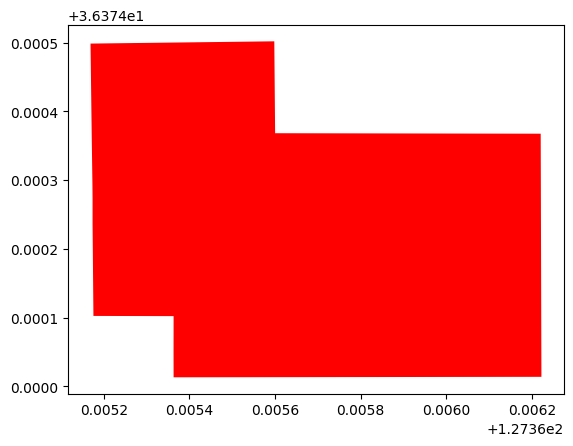

In [8]:
polygon_coords = buildings.get_coordinates()[['x', 'y']].to_numpy().reshape(-1, 2)
plt.fill(polygon_coords[:,0], polygon_coords[:,1], 'r')

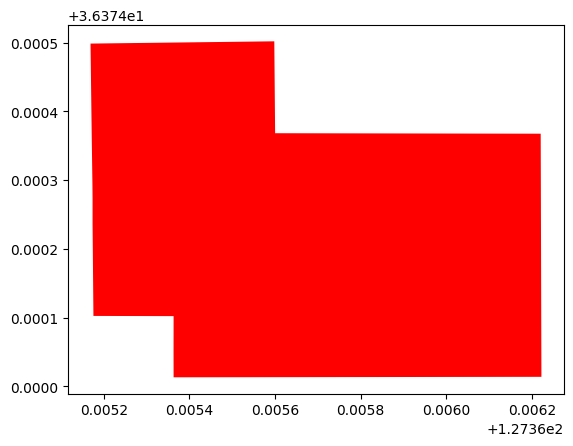

In [9]:
plt.fill(polygon_coords[:,0], polygon_coords[:,1], 'r')

top:     988000.1288090819
left:    1819626.6479135496
bottom:  987905.704694655
right:   1819680.8664739528


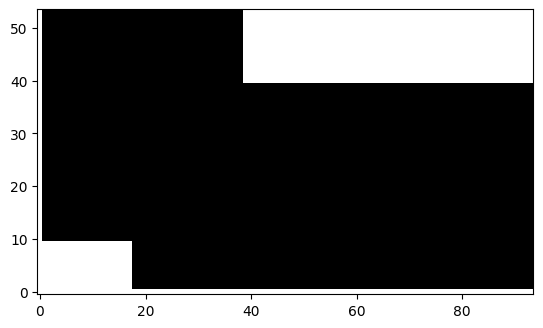

In [10]:
polygon_coords = buildings.get_coordinates()[['x', 'y']].to_numpy().reshape(-1, 2)
polygon_coords = latlonTransformer(polygon_coords, 'WGS84', 'epsg:5179')
maparray = poly2numpy([polygon_coords])
plt.imshow(maparray, cmap='gray_r',origin='lower')

In [ ]:
# Plot footprints 
a= buildings.plot()

In [ ]:
# set the display line to max
pd.set_option('display.max_columns', None)
buildings['name:ja']
# find the column 'name:ja' contains "N1"
a = buildings['name:en']
# find the index of the row that contains "N1" ignore the nan
a = a[a.str.contains("N1", na=False)]



In [ ]:
for idx, building in enumerate(buildings):
    print(building)


In [ ]:
# turn the plot into a image file and save the topLeft and bottomRight coordinates in lon and lat
a= buildings.plot()
fig = a.get_figure()

